In [75]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

energy = pd.read_csv('https://raw.githubusercontent.com/Borgarelli/IAHourly_energy_demand_generation_weather/main/energy_dataset.csv')
energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [76]:
energy_columns = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas',
                     'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil']

energy_data = energy[energy_columns]

energy_data = energy_data.fillna(energy_data.mean())

energy_data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil
0,447.0,329.0,0.0,4844.0,4821.0,162.0
1,449.0,328.0,0.0,5196.0,4755.0,158.0
2,448.0,323.0,0.0,4857.0,4581.0,157.0
3,438.0,254.0,0.0,4314.0,4131.0,160.0
4,428.0,187.0,0.0,4130.0,3840.0,156.0


In [77]:
# Normaliza os dados (opcional, mas muitas vezes útil para algoritmos de agrupamento)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

energy_data_scaled = scaler.fit_transform(energy_data)
energy_data.head(5)

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil
0,447.0,329.0,0.0,4844.0,4821.0,162.0
1,449.0,328.0,0.0,5196.0,4755.0,158.0
2,448.0,323.0,0.0,4857.0,4581.0,157.0
3,438.0,254.0,0.0,4314.0,4131.0,160.0
4,428.0,187.0,0.0,4130.0,3840.0,156.0


In [82]:
# Agrupa usando K-Means
num_clusters = 3  # Número de clusters desejado
model = KMeans(n_clusters=num_clusters, random_state=42)
model.fit(energy_data_scaled)
cluster_labels = model.labels_

energy_data.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil
0,447.0,329.0,0.0,4844.0,4821.0,162.0
1,449.0,328.0,0.0,5196.0,4755.0,158.0
2,448.0,323.0,0.0,4857.0,4581.0,157.0
3,438.0,254.0,0.0,4314.0,4131.0,160.0
4,428.0,187.0,0.0,4130.0,3840.0,156.0


In [83]:
# PCA para redução de dimensionalidade para visualização
pca = PCA(n_components=2)
pca_array = pca.fit_transform(energy_data_scaled)

# Converte em dataframe
df_pca = pd.DataFrame(data=pca_array, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels
df_pca.head()

,PC1,PC2,Cluster
0,0.972072,0.204119,0
1,0.950991,0.296883,0
2,1.081609,0.221638,0
3,1.422067,0.086234,0
4,1.702798,0.094277,0


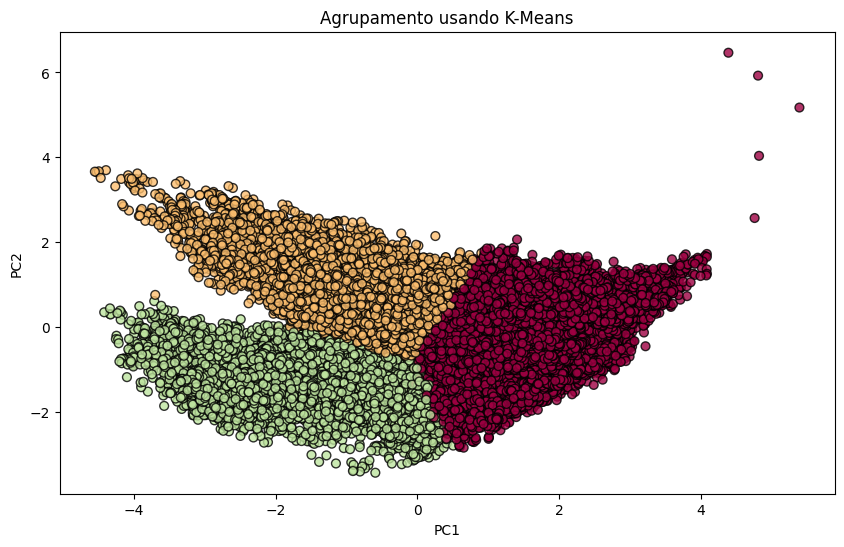

In [84]:
# Visualização
plt.figure(figsize=(10, 6))
colors = plt.cm.Spectral(df_pca['Cluster'].astype(float) / num_clusters)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=colors, edgecolor='k', s=40, alpha=0.8)
plt.title('Agrupamento usando K-Means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

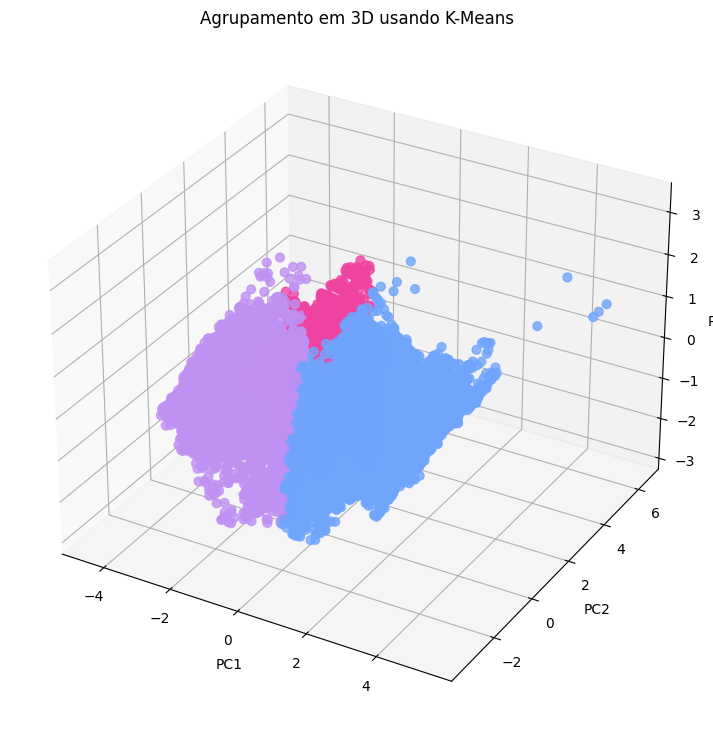

In [85]:
# Import libraries
from mpl_toolkits import mplot3d

# Adiciona uma terceira componente principal (PC3) ao DataFrame df_pca
pca_3d = PCA(n_components=3)
pca_array_3d = pca_3d.fit_transform(energy_data_scaled)
df_pca_3d = pd.DataFrame(data=pca_array_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Cluster'] = cluster_labels
colors = ['#70a5fd', '#EF43A2', '#bf91f3', '#5DF534']
df_pca_3d['color'] = df_pca_3d['Cluster'].map({0: colors[0], 1: colors[1], 2: colors[2], 3: colors[3]})

# Criando a figura
fig = plt.figure(figsize=(12, 9))
ax = plt.axes(projection="3d")

# Criando o gráfico de dispersão em 3D
ax.scatter3D(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], c=df_pca_3d['color'], s=40, alpha=0.8)

# Configurando rótulos dos eixos
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Agrupamento em 3D usando K-Means')

# Exibindo o gráfico
plt.show()